In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.gridspec as gridspec
sns.set_theme(style="whitegrid")
from matplotlib.lines import Line2D
import svgutils.compose as sc
import PyPDF2

In [93]:
# a function that print all the metrics mentioned above
def print_metrics(y_true, y_original, y_stemmed, name_original = 'original', name_stemmed = ' stemmed'):
    # calculate the Mean Absolute Error between correct_rate and c_w_p_m return a single value
    from sklearn.metrics import mean_absolute_error
    # calculate the Mean Absolute percentage Error between correct_rate and c_w_p_m return a single value
    # print original and stemmed in one line
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    # calculate the Mean Square percentage Error between correct_rate and c_w_p_m return a single value
    # print original and stemmed
    def mean_squared_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.square((y_true - y_pred) / y_true)) * 100
    # calculate the Mean Square Error between correct_rate and c_w_p_m return a single value
    from sklearn.metrics import mean_squared_error
    # a function that calculate the Mean Absolute Error of middle 60% of the Error between correct_rate and c_w_p_m
    # print original and stemmed in one line
    def mean_absolute_error_middle_60(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        error = np.abs((y_true - y_pred))
        error = np.sort(error)
        error = error[int(len(error) * 0.2):int(len(error) * 0.8)]
        return np.mean(error)
    # a function that calculate the Mean Absolute percentage Error of middle 60% of the Error between correct_rate and c_w_p_m a
    def mean_absolute_percentage_error_middle_60(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        error = np.abs((y_true - y_pred) / y_true)
        error = np.sort(error)
        error = error[int(len(error) * 0.2):int(len(error) * 0.8)]
        return np.mean(error) * 100
    print(f'MAE {name_original}: ', mean_absolute_error(y_true, y_original))
    print(f'MAE {name_stemmed}: ', mean_absolute_error(y_true, y_stemmed))
    print(f'MAPE {name_original}: ', mean_absolute_percentage_error(y_true, y_original))
    print(f'MAPE {name_stemmed}: ', mean_absolute_percentage_error(y_true, y_stemmed))
    print(f'MSE {name_original}: ', mean_squared_error(y_true, y_original))
    print(f'MSE {name_stemmed}: ', mean_squared_error(y_true, y_stemmed))
    print(f'MSPE {name_original}: ', mean_squared_percentage_error(y_true, y_original))
    print(f'MSPE {name_stemmed}: ', mean_squared_percentage_error(y_true, y_stemmed))
    print(f'MAE middle 60% {name_original}: ', mean_absolute_error_middle_60(y_true, y_original))
    print(f'MAE middle 60% {name_stemmed}: ', mean_absolute_error_middle_60(y_true, y_stemmed))
    print(f'MAPE middle 60% {name_original}: ', mean_absolute_percentage_error_middle_60(y_true, y_original))
    print(f'MAPE middle 60% {name_stemmed}: ', mean_absolute_percentage_error_middle_60(y_true, y_stemmed))

In [94]:
# a function that print all the metrics mentioned above
def print_metrics_deep(y_true, y_original):
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    import numpy as np
    
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    def mean_squared_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.square((y_true - y_pred) / y_true)) * 100

    def mean_absolute_error_middle_60(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        error = np.abs((y_true - y_pred))
        error = np.sort(error)
        error = error[int(len(error) * 0.2):int(len(error) * 0.8)]
        return np.mean(error)

    def mean_absolute_percentage_error_middle_60(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        error = np.abs((y_true - y_pred) / y_true)
        error = np.sort(error)
        error = error[int(len(error) * 0.2):int(len(error) * 0.8)]
        return np.mean(error) * 100

    print('MAE original: ', mean_absolute_error(y_true, y_original))
    print('MAPE original: ', mean_absolute_percentage_error(y_true, y_original))
    print('MSE original: ', mean_squared_error(y_true, y_original))
    print('MSPE original: ', mean_squared_percentage_error(y_true, y_original))
    print('MAE middle 60% original: ', mean_absolute_error_middle_60(y_true, y_original))
    print('MAPE middle 60% original: ', mean_absolute_percentage_error_middle_60(y_true, y_original))


In [95]:
# read yrs12_asr_scoring_words_raw.csv
df = pd.read_csv('./DataFolder/Original_CSV/yrs12_word.csv')

/var/folders/1v/x2fb1jkd4878lndzgpm1btm40000gn/T/ipykernel_53863/1346083944.py:2: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./DataFolder/Original_CSV/yrs12_word.csv')


In [96]:
# set NAN and INF to 0 in score_asr
# convert score_asr to int
df['score_asr'] = df['score_asr'].fillna(0)
df['score_asr'] = df['score_asr'].replace([np.inf, -np.inf], 0)
df['score_asr'] = df['score_asr'].astype(int)

In [97]:
# group by student id, passage id and session id
# return the sum asr_score and the smallest value of start and the largest value of end
df2 = df.groupby(['student_id', 'passage_id', 'session_id']).agg({'score_asr': 'sum','totalwords_passage': 'mean', 'start': 'min', 'end': 'max'})
#calculate the duration and drop the start and end columns and convert result from seconds to minutes
df2['duration'] = (df2['end'] - df2['start']) / 6000
df2 = df2.drop(columns=['start', 'end'])
#calculate the correct rate and convert result from seconds to minutes
df2['correct_rate'] = df2['score_asr'] / df2['duration']

In [98]:
# query the rows with index student_id == 1000 and passage_id == 31008
df2.loc[(405, 21072)]

,score_asr,totalwords_passage,duration,correct_rate
session_id,,,,
55428d8298d7a,22,25.0,0.243,90.534979


In [99]:
# read another csv c_w_p_m.csv
df3 = pd.read_csv('c_w_p_m.csv')
#seperate the in 'file' column into 'student_id' and 'passage_id' and 'session_id'
#file column is in the format of student_{student_id}_passage_{passage_id}_{session_id}
df3[['student_id', 'passage_id', 'session_id']] = df3['file'].str.split('_', expand=True)[[1,3,4]]
#convert the student_id and passage_id to int
df3['student_id'] = df3['student_id'].astype(int)
df3['passage_id'] = df3['passage_id'].astype(int)
#drop the file column
df3 = df3.drop(columns=['file'])
#set a multi level index to student_id and passage_id and session_id
df3 = df3.set_index(['student_id', 'passage_id', 'session_id'])
# rename all the columns to original_{column_name}
df3 = df3.rename(columns=lambda x: 'original_' + x)

In [100]:
# read another csv c_w_p_m_stemmed.csv
# repeat the same process as above
df4 = pd.read_csv('c_w_p_m_stemmed.csv')
df4[['student_id', 'passage_id', 'session_id']] = df4['file'].str.split('_', expand=True)[[1,3,4]]
df4['student_id'] = df4['student_id'].astype(int)
df4['passage_id'] = df4['passage_id'].astype(int)
df4 = df4.drop(columns=['file'])
df4 = df4.set_index(['student_id', 'passage_id', 'session_id'])
# rename all the columns to stemmed_{column_name}
df4 = df4.rename(columns=lambda x: 'stemmed_' + x)

In [101]:
# read Deep Features Matching
df7 = pd.read_csv('./DataFolder/Student_Response/Save_CSV/Deep_Match_result_Deep_Feature_model_9_Numpy.csv.gz', compression='gzip')
df7[['student_id', 'passage_id', 'session_id']] = df7['file'].str.split('_', expand=True)[[1,3,4]]
df7['student_id'] = df7['student_id'].astype(int)
df7['passage_id'] = df7['passage_id'].astype(int)
df7 = df7.drop(columns=['file'])
df7 = df7.set_index(['student_id', 'passage_id', 'session_id'])

In [102]:
#join the three dataframes df2 df3 and df4 with index as keys
df5 = df2.join(df3, how='inner')
df5 = df5.join(df4, how='inner')
# sort by student_id and passage_id then session_id
df5 = df5.sort_values(by=['student_id', 'passage_id', 'session_id'])

In [103]:
# drop row if total word is smaller than 4
df6 = df5[df5['stemmed_total_word'] > 10]

In [104]:
df8 = df2.join(df7, how='inner')
df8 = df8.sort_values(by=['student_id', 'passage_id', 'session_id'])

In [105]:
# Create a new dataframe that filter out df5 with index both in df8 and df5
df9 = df5[df5.index.isin(df8.index)]

In [106]:
# Create a new dataframe that filter out df8 with index both in df8 and df6
df10 = df8[df8.index.isin(df5.index)]

In [107]:
print("df8: result of deep feature matching")
print_metrics_deep(df8['correct_rate'], df8['word_correct_per_minutes'])

df8: result of deep feature matching
MAE original:  8.394675856350608
MAPE original:  9.93471571914454
MSE original:  280.26849917367304
MSPE original:  5.359257914701399
MAE middle 60% original:  4.811887059510527
MAPE middle 60% original:  4.611114067046166


In [108]:
print("df10: result of deep feature matching, filtered by remove result not in original method")
print_metrics_deep(df10['correct_rate'], df10['word_correct_per_minutes'])

df10: result of deep feature matching, filtered by remove result not in original method
MAE original:  8.394675856350608
MAPE original:  9.93471571914454
MSE original:  280.26849917367304
MSPE original:  5.359257914701399
MAE middle 60% original:  4.811887059510527
MAPE middle 60% original:  4.611114067046166


In [109]:
print("df9: result of original method, filtered by remove result not in new proposed method")
print_metrics(df9['correct_rate'], df9['original_c_w_p_m'], df9['stemmed_c_w_p_m'])

df9: result of original method, filtered by remove result not in new proposed method
MAE original:  15.821130224745708
MAE  stemmed:  14.075244218810864
MAPE original:  19.832827801314735
MAPE  stemmed:  16.16076668975386
MSE original:  808.9957030760409
MSE  stemmed:  494.8423463963109
MSPE original:  97.48925736718313
MSPE  stemmed:  27.466750467070067
MAE middle 60% original:  11.120287193039042
MAE middle 60%  stemmed:  9.735893843416754
MAPE middle 60% original:  10.946189403757197
MAPE middle 60%  stemmed:  9.647314075028769


In [110]:
print_metrics(df5['correct_rate'], df5['original_c_w_p_m'], df5['stemmed_c_w_p_m'])
print('-----------Dropping Empty Result Below------------')
print_metrics(df6['correct_rate'], df6['original_c_w_p_m'], df6['stemmed_c_w_p_m'])

MAE original:  19.43742517766183
MAE  stemmed:  17.96801027837258
MAPE original:  40.027014475486425
MAPE  stemmed:  37.96266042816769
MSE original:  1263.341927607191
MSE  stemmed:  1165.9517296809781
MSPE original:  23255.866452235798
MSPE  stemmed:  23234.135312002356
MAE middle 60% original:  12.747693107724826
MAE middle 60%  stemmed:  11.281751893609858
MAPE middle 60% original:  13.526965924633187
MAPE middle 60%  stemmed:  12.113438473989358
-----------Dropping Empty Result Below------------
MAE original:  16.5608764105794
MAE  stemmed:  15.13716129628083
MAPE original:  15.75464541694373
MAPE  stemmed:  14.589210708428274
MSE original:  579.3639221058249
MSE  stemmed:  516.6345018993496
MSPE original:  6.15577248332303
MSPE  stemmed:  5.900499888097761
MAE middle 60% original:  12.129352973981408
MAE middle 60%  stemmed:  10.624536798921286
MAPE middle 60% original:  12.098812168680796
MAPE middle 60%  stemmed:  10.667989219892233


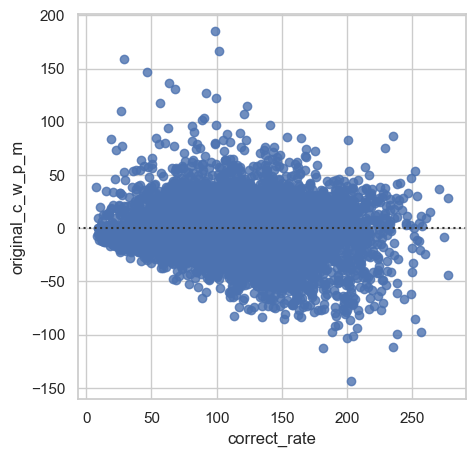

In [111]:
import matplotlib.pyplot as plt
# Create a figure with 10,5 inches
fig = plt.figure(figsize=(5,5))
#Draw a Q-Q plot between correct_rate and c_w_p_m using seaborn,
ax = sns.residplot(x="correct_rate", y="original_c_w_p_m", data=df6)
# save the plot as a eps file

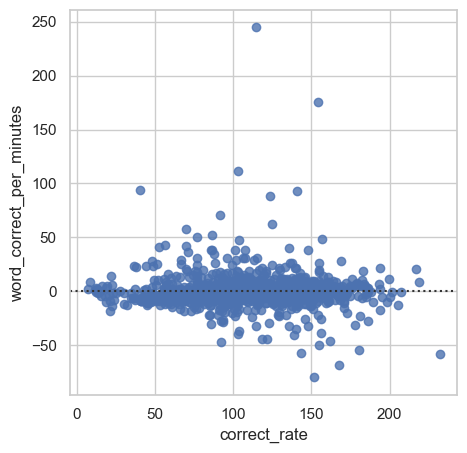

In [112]:
fig = plt.figure(figsize=(5,5))
#Draw a Q-Q plot between correct_rate and c_w_p_m using seaborn,
ax = sns.residplot(x="correct_rate", y="word_correct_per_minutes", data=df8)
# save the plot as a eps file

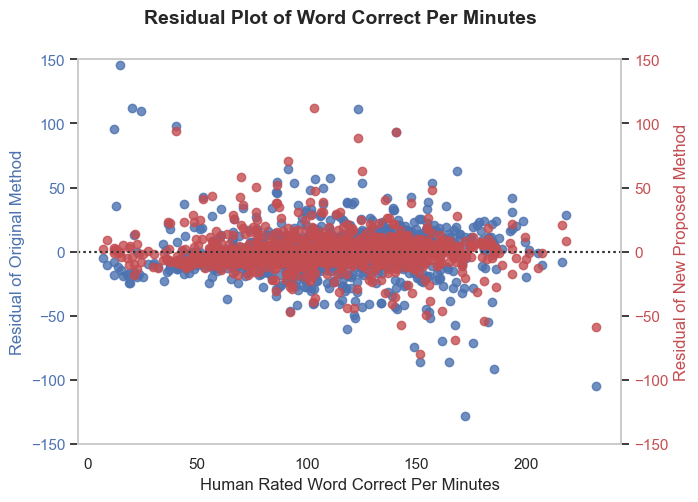

In [113]:
fig, ax1 = plt.subplots(figsize=(7, 5))

# Set range for both y-axes
y_range = (-150, 150)

# Plot the first residual plot on ax1
sns.residplot(x="correct_rate", y="stemmed_c_w_p_m", data=df9, ax=ax1, color='b')
ax1.set_ylim(y_range)
ax1.set_xlabel('Human Rated Word Correct Per Minutes')
ax1.set_ylabel('Residual of Original Method', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(False)

# Create a twin Axes sharing the x-axis
ax2 = ax1.twinx()
sns.residplot(x="correct_rate", y="word_correct_per_minutes", data=df10, ax=ax2, color='r', )
# Offset the y-axis of ax2 by -50
ax2.set_ylim([value + 0 for value in y_range])
ax2.set_ylabel('Residual of New Proposed Method', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)

# Set y-ticks to align grids
yticks = np.linspace(y_range[0], y_range[1], 7)  # example with 7 grid lines
ax1.set_yticks(yticks)
ax2.set_yticks(yticks + 0)  # apply offset
#Set title for the figure using bold font and larger font size
fig.suptitle('Residual Plot of Word Correct Per Minutes', fontsize=14, fontweight='bold')

# Save the figure
fig.savefig('Comparison_Residual.pdf', format='pdf')

/var/folders/1v/x2fb1jkd4878lndzgpm1btm40000gn/T/ipykernel_53863/1250250431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9.loc[:,'residual_stemmed'] = df9.loc[:,'stemmed_c_w_p_m'] - df9.loc[:,'correct_rate']


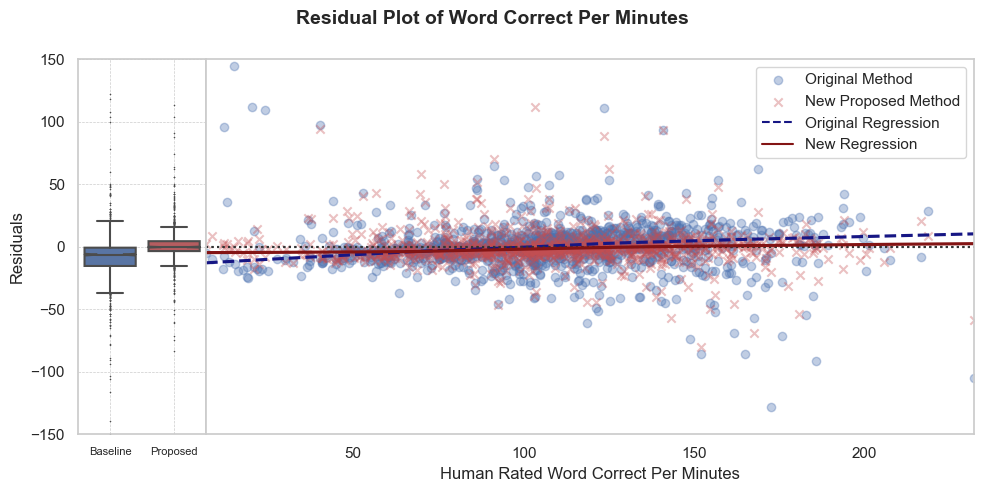

In [114]:
dark_colors = [sns.color_palette("dark")[0], sns.color_palette("dark")[2]]

# Sample data for testing
# df9 and df10 should be provided
y_range = (-150, 150)
# Calculate the residuals for both methods
df9.loc[:,'residual_stemmed'] = df9.loc[:,'stemmed_c_w_p_m'] - df9.loc[:,'correct_rate']
df10.loc[:, 'residual_word'] = df10.loc[:,'word_correct_per_minutes'] - df10.loc[:,'correct_rate']

# Create a grid of 1 row and 2 columns with no spacing between columns
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 6], wspace=0.0)

fig = plt.figure(figsize=(10, 5))

# Define Seaborn colors (blue for original and red for new)
colors = [sns.color_palette("deep")[0], sns.color_palette("deep")[3]]

# Violin plot of residuals on the left (column 0)
ax0 = plt.subplot(gs[0])
sns.boxplot(data=[df9['residual_stemmed'], df10['residual_word']],
            orient='v', ax=ax0, palette=colors, notch=True, fliersize=0.5,
            flierprops={"marker": "x"})
ax0.set_xticklabels(['Baseline', 'Proposed'], rotation=0, fontsize=8)
ax0.set_ylabel('Residuals')
ax0.set_ylim(y_range)
ax0.grid(True, which='both', linestyle='--', linewidth=0.5)

# Residual plots on the right (column 1)
ax1 = plt.subplot(gs[1])
sns.residplot(x="correct_rate", y="stemmed_c_w_p_m", data=df9, ax=ax1, color=colors[0], label='Original Method', scatter_kws={'alpha':0.35, 'marker':'o'},  lowess=True, line_kws=dict(color=sns.dark_palette('blue')[2], linestyle='--'))
sns.residplot(x="correct_rate", y="word_correct_per_minutes", data=df10, ax=ax1, color=colors[1], label='New Proposed Method', scatter_kws={'alpha':0.35, 'marker':'x'},   lowess=True, line_kws=dict(color=sns.dark_palette('red')[2], linestyle='-'))

# Turn off y-axis label and tick marks for the residual plots
ax1.set_ylabel('')
ax1.yaxis.set_ticks([])
ax1.set_ylim(y_range)
ax1.set_xlabel('Human Rated Word Correct Per Minutes')
ax1.grid(False)

# Legend for the residual plots
ax1.legend(loc='upper right')
handles, labels = ax1.get_legend_handles_labels()
line1 = Line2D([0], [0], linestyle='--', color=sns.dark_palette('blue')[2], label='Original Regression')
line2 = Line2D([0], [0], linestyle='-', color=sns.dark_palette('red')[2], label='New Regression')

handles.extend([line1, line2])
labels.extend(['Original Regression', 'New Regression'])
ax1.legend(handles=handles, labels=labels)
# Set title for the figure using bold font and larger font size
fig.suptitle('Residual Plot of Word Correct Per Minutes', fontsize=14, fontweight='bold')

# Save the figure
fig.tight_layout()
fig.savefig('Comparison_Residual.pdf', format='pdf', bbox_inches='tight')

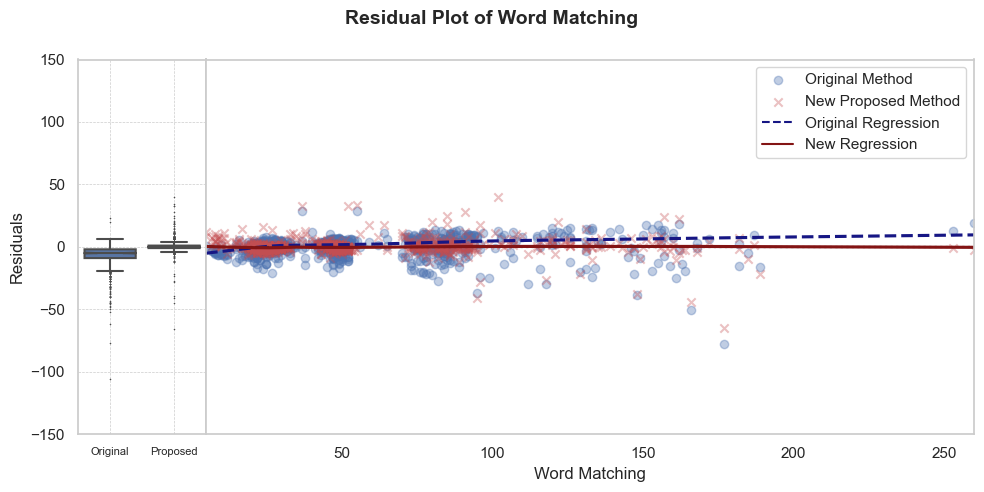

In [115]:
dark_colors = [sns.color_palette("dark")[0], sns.color_palette("dark")[2]]

# Sample data for testing
# df10 should be provided
y_range = (-150, 150)

# Create a copy of df10 to avoid modifying the original dataframe
df10_copy = df10[df10['score_asr'] <= 1000].copy()

# Calculate the residuals for both methods
df10_copy.loc[:,'residual_old'] = df10_copy.loc[:,'old_matched_adj_count'] - df10_copy.loc[:,'score_asr']
df10_copy.loc[:,'residual_new'] = df10_copy.loc[:,'new_matched_adj_count'] - df10_copy.loc[:,'score_asr']

# Create a grid of 1 row and 2 columns with no spacing between columns
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 6], wspace=0.0)

fig = plt.figure(figsize=(10, 5))

# Define Seaborn colors (blue for original and red for new)
colors = [sns.color_palette("deep")[0], sns.color_palette("deep")[3]]

# Violin plot of residuals on the left (column 0)
ax0 = plt.subplot(gs[0])
sns.boxplot(data=[df10_copy['residual_old'], df10_copy['residual_new']],
            orient='v', ax=ax0, palette=colors, notch=True, fliersize=0.5,
            flierprops={"marker": "x"})
ax0.set_xticklabels(['Original', 'Proposed'], rotation=0, fontsize=8)
ax0.set_ylabel('Residuals')
ax0.set_ylim(y_range)
ax0.grid(True, which='both', linestyle='--', linewidth=0.5)

# Residual plots on the right (column 1)
ax1 = plt.subplot(gs[1])
sns.residplot(x="score_asr", y="old_matched_adj_count", data=df10_copy, ax=ax1, robust=False, color=colors[0], label='Original Method', scatter_kws={'alpha':0.35, 'marker':'o'},  lowess=True, line_kws=dict(color=sns.dark_palette('blue')[2], linestyle='--'))
sns.residplot(x="score_asr", y="new_matched_adj_count", data=df10_copy, ax=ax1, robust=False, color=colors[1], label='New Proposed Method', scatter_kws={'alpha':0.35, 'marker':'x'},   lowess=True, line_kws=dict(color=sns.dark_palette('red')[2], linestyle='-'))

# Turn off y-axis label and tick marks for the residual plots
ax1.set_ylabel('')
ax1.yaxis.set_ticks([])
ax1.set_ylim(y_range)
ax1.set_xlabel('Word Matching')  # Updated the x-axis label
ax1.grid(False)

# Legend for the residual plots
ax1.legend(loc='upper right')
handles, labels = ax1.get_legend_handles_labels()
line1 = Line2D([0], [0], linestyle='--', color=sns.dark_palette('blue')[2], label='Original Regression')
line2 = Line2D([0], [0], linestyle='-', color=sns.dark_palette('red')[2], label='New Regression')

handles.extend([line1, line2])
labels.extend(['Original Regression', 'New Regression'])
ax1.legend(handles=handles, labels=labels)

# Set title for the figure using bold font and larger font size
fig.suptitle('Residual Plot of Word Matching', fontsize=14, fontweight='bold')  # Updated the title

# Save the figure
fig.tight_layout()
fig.savefig('Comparison_Residual_match.pdf', format='pdf', bbox_inches='tight')


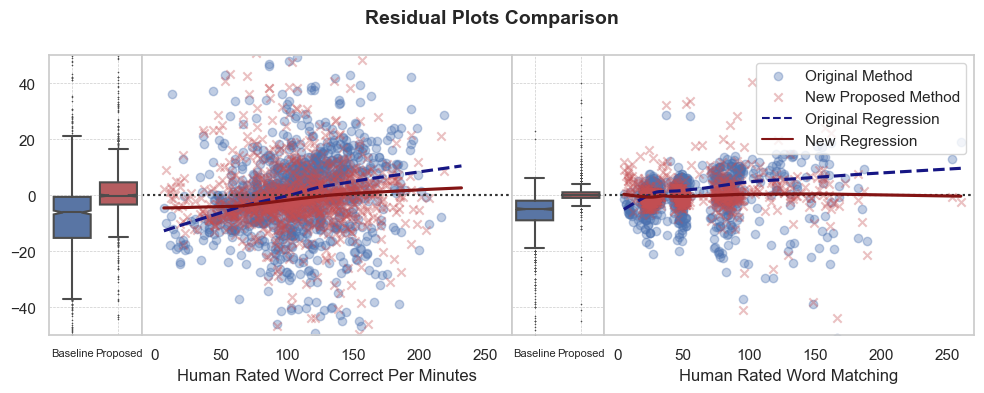

In [116]:
dark_colors = [sns.color_palette("dark")[0], sns.color_palette("dark")[2]]
y_range = (-50, 50)
x_range = (-10, 270)
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 4, 1, 4], hspace=0.0, wspace=0.0) # Note: Added hspace for separation
fig = plt.figure(figsize=(10, 4))
ro = False
colors = [sns.color_palette("deep")[0], sns.color_palette("deep")[3]]

# Old Figure (from df9)
# Violin Plot
ax0 = plt.subplot(gs[0, 0])
sns.boxplot(data=[df9['residual_stemmed'], df10['residual_word']],
            orient='v', ax=ax0, palette=colors, notch=True, fliersize=0.5,
            flierprops={"marker": "x"})
ax0.set_xticklabels(['Baseline', 'Proposed'], rotation=0, fontsize=8)
ax0.set_ylabel('Residuals')
ax0.set_ylim(y_range)
ax0.grid(True, which='both', linestyle='--', linewidth=0.5)

# Residual Plot
ax1 = plt.subplot(gs[0, 1])
sns.residplot(x="correct_rate", y="stemmed_c_w_p_m", data=df9, ax=ax1, robust=ro, color=colors[0], label='Original Method', scatter_kws={'alpha':0.35, 'marker':'o'},  lowess=True, line_kws=dict(color=sns.dark_palette('blue')[2], linestyle='--'))
sns.residplot(x="correct_rate", y="word_correct_per_minutes", data=df10, ax=ax1, robust=ro, color=colors[1], label='New Proposed Method', scatter_kws={'alpha':0.35, 'marker':'x'},   lowess=True, line_kws=dict(color=sns.dark_palette('red')[2], linestyle='-'))

# New Figure (from df10_copy)
# Violin Plot
ax2 = plt.subplot(gs[0, 2])
sns.boxplot(data=[df10_copy['residual_old'], df10_copy['residual_new']],
            orient='v', ax=ax2, palette=colors, notch=True, fliersize=0.5,
            flierprops={"marker": "x"})
ax2.set_xticklabels(['Baseline', 'Proposed'], rotation=0, fontsize=8)
ax2.set_ylabel('Residuals')
ax2.set_ylim(y_range)
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)

# Residual Plot
ax3 = plt.subplot(gs[0, 3])
sns.residplot(x="score_asr", y="old_matched_adj_count", data=df10_copy, ax=ax3, robust=ro, color=colors[0], label='Original Method', scatter_kws={'alpha':0.35, 'marker':'o'},  lowess=True, line_kws=dict(color=sns.dark_palette('blue')[2], linestyle='--'))
sns.residplot(x="score_asr", y="new_matched_adj_count", data=df10_copy, ax=ax3, robust=ro, color=colors[1], label='New Proposed Method', scatter_kws={'alpha':0.35, 'marker':'x'},   lowess=True, line_kws=dict(color=sns.dark_palette('red')[2], linestyle='-'))

ax1.set_xlabel('Human Rated Word Correct Per Minutes')
ax3.set_xlabel('Human Rated Word Matching')
for ax_now in [ax1, ax3]:
    ax_now.set_ylabel('')
    ax_now.set_ylim(y_range)
    ax_now.set_xlim(x_range)
    xticks = ax_now.get_xticks()
    # ax_now.set_xticks(xticks[1:-1])
    ax_now.tick_params(axis='y', which='both', labelright=False, labelleft=False)
    ax_now.grid(False)
# Legend for the residual plots
ax_now.legend(loc='upper right')
handles, labels = ax_now.get_legend_handles_labels()
line1 = Line2D([0], [0], linestyle='--', color=sns.dark_palette('blue')[2], label='Original Regression')
line2 = Line2D([0], [0], linestyle='-', color=sns.dark_palette('red')[2], label='New Regression')

handles.extend([line1, line2])
labels.extend(['Original Regression', 'New Regression'])
ax_now.legend(loc='upper right', handles=handles, labels=labels)

for ax_now in [ax0, ax2]:
    ax_now.set_ylabel('')
    ax_now.tick_params(axis='y', which='both', labelright=False, labelleft=False)
    ax_now.set_ylim(y_range)
    ax_now.grid(True)

ax0.tick_params(axis='y', which='both', labelright=False, labelleft=True)
# ax1.set_title('Words Correct Per Minutes')
# ax3.set_title('Words Match')
fig.suptitle('Residual Plots Comparison', fontsize=14, fontweight='bold')

fig.tight_layout()
fig.savefig('Comparison_Residual_2.pdf', format='pdf', bbox_inches='tight')


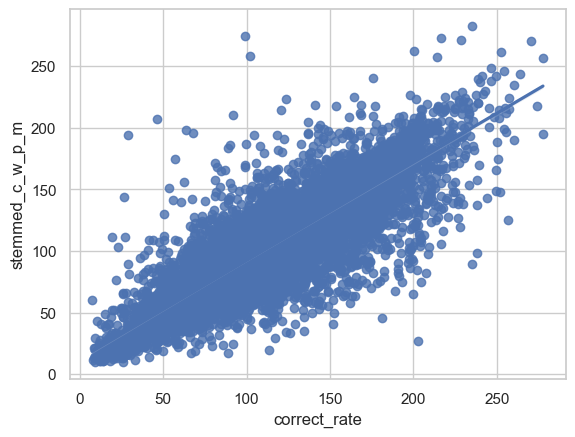

In [117]:
#Draw a Q-Q plot between correct_rate and c_w_p_m_stemmed using seaborn
ax = sns.regplot(x="correct_rate", y="stemmed_c_w_p_m", data=df6)

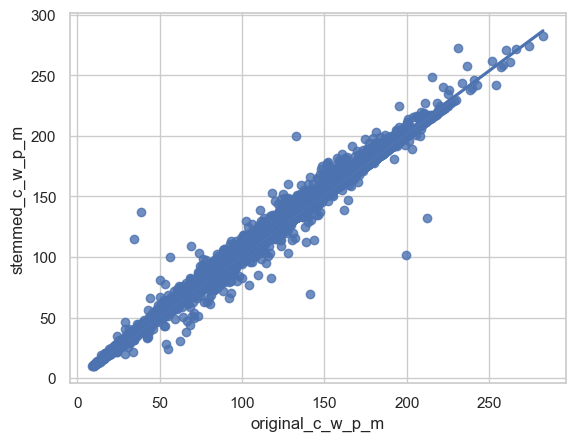

In [118]:
#Draw a Q-Q plot between c_w_p_m and c_w_p_m_stemmed using seaborn
ax = sns.regplot(x="original_c_w_p_m", y="stemmed_c_w_p_m", data=df6)

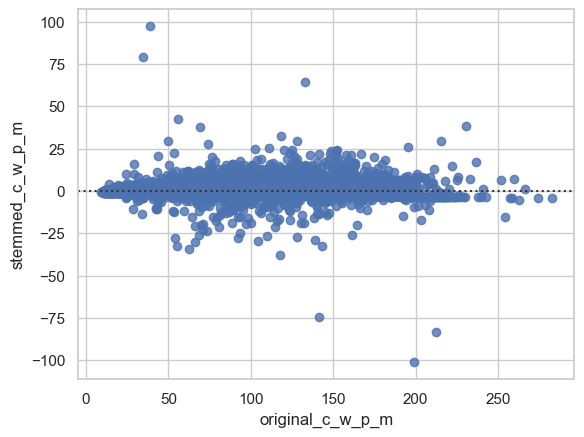

In [119]:
#Draw a Q-Q plot between c_w_p_m and c_w_p_m using seaborn
ax = sns.residplot(x="original_c_w_p_m", y="stemmed_c_w_p_m", data=df6)

In [120]:
# Calculate the MAE between score_asr and new_matched_adj_count in df10
print_metrics(df10['score_asr'], df10['old_matched_adj_count'], df10['new_matched_adj_count'], 'old_method_count', 'new_method_count')

MAE old_method_count:  7.556637168141593
MAE new_method_count:  2.4442477876106197
MAPE old_method_count:  16.41663909630209
MAPE new_method_count:  6.370854494116274
MSE old_method_count:  136.34070796460176
MSE new_method_count:  28.353982300884955
MSPE old_method_count:  4.963331131360226
MSPE new_method_count:  2.798818667139611
MAE middle 60% old_method_count:  5.209439528023599
MAE middle 60% new_method_count:  1.336283185840708
MAPE middle 60% old_method_count:  13.045828236455606
MAPE middle 60% new_method_count:  3.1893063048732295


# Plot above 2 graphs on the same plot side by side
fig2, (ax2, ax1) = plt.subplots(1, 2, figsize=(10,3))
sns.histplot(data=df10, x="correct_rate", color="b", label="Human Rater", kde= True, ax=ax1)
sns.histplot(data=df10, x="word_correct_per_minutes", color="red", label="New Proposed Method", kde= True, ax=ax1)
# use smaller legend size
ax1.legend()
ax1.set_ylim([0, 170])

ax1.set_xlabel('Word Correct Per Minutes')
# Set x axis from 0 to 250
ax1.set_xlim([0, 250])
# Add title
ax1.set_title('New Proposed Method', loc = 'right')
sns.histplot(data=df9, x="correct_rate", color="b", label="Human Rater", kde= True, ax=ax2)
sns.histplot(data=df9, x="stemmed_c_w_p_m", color="red", label="Base Line Method", kde= True, ax=ax2)
ax2.legend()
ax2.set_xlabel('Word Correct Per Minutes')
ax2.set_xlim([0, 250])
ax2.set_ylim([0, 170])
ax2.set_title('Baseline Method', loc = 'left')

# Set title for the figure using bold font and larger font size
fig2.suptitle('Histogram of Word Correct Per Minutes', fontsize=14, fontweight='bold')

# Save the figure
fig.tight_layout()
fig2.savefig('Comparison_Histogram.pdf', format='pdf')
fig.savefig('Comparison_Histogram.svg', format='svg')

/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py

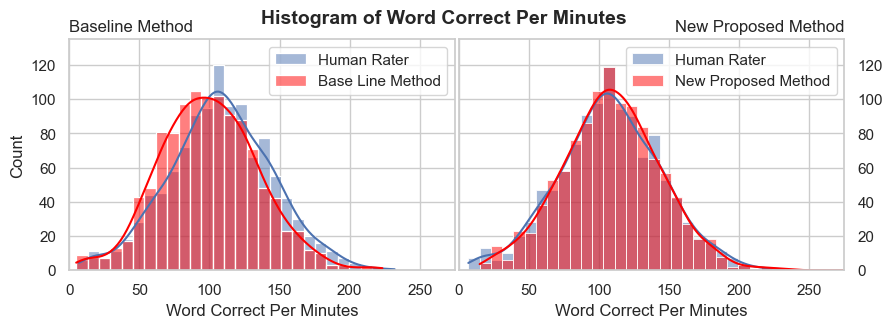

In [121]:
fig2 = plt.figure(figsize=(10, 3))

# Create a GridSpec with 1 row and 2 columns
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.01) 
ylim = (0, 135)
xlim = (0, 275)
ax2 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])


# Bin Edge
# 1. Determine the range for bins
overall_min = min(df10['correct_rate'].min(), df10['word_correct_per_minutes'].min())
overall_max = max(df10['correct_rate'].max(), df10['word_correct_per_minutes'].max())

# Set bin width
bin_width = 8

# Calculate number of bins based on bin width
num_bins = int((overall_max - overall_min) / bin_width)
# 3. Calculate bin edges
bin_edges = np.linspace(overall_min, overall_max, num_bins+1)

# Plotting data as before
sns.histplot(data=df10, x="correct_rate", color="b", bins=bin_edges, label="Human Rater", kde=True, ax=ax1)
sns.histplot(data=df10, x="word_correct_per_minutes", color="red", bins=bin_edges, label="New Proposed Method", kde=True, ax=ax1)
ax1.legend()
ax1.set_ylim(ylim)
ax1.set_xlabel('Word Correct Per Minutes')
ax1.set_xlim(xlim)
ax1.set_title('New Proposed Method', loc='right')
ax1.tick_params(axis='y', which='both', labelright=True, labelleft=False)
ax1.yaxis.set_label_position("right")
ax1.set_ylabel('')

# Bin Edge
# 1. Determine the range for bins
overall_min = min(df9['correct_rate'].min(), df9['stemmed_c_w_p_m'].min())
overall_max = max(df9['correct_rate'].max(), df9['stemmed_c_w_p_m'].max())

# 2. Calculate number of bins based on bin width
num_bins = int((overall_max - overall_min) / bin_width)
# 3. Calculate bin edges
bin_edges = np.linspace(overall_min, overall_max, num_bins+1)

sns.histplot(data=df9, x="correct_rate", color="b", bins=bin_edges, label="Human Rater", kde=True, ax=ax2)
sns.histplot(data=df9, x="stemmed_c_w_p_m", color="red", bins=bin_edges, label="Base Line Method", kde=True, ax=ax2)
ax2.legend()
ax2.set_xlabel('Word Correct Per Minutes')
ax2.set_xlim(xlim)
xticks = ax2.get_xticks()
ax2.set_xticks(xticks[:-1])
ax2.set_ylim(ylim)
ax2.set_title('Baseline Method', loc='left')

fig2.suptitle('Histogram of Word Correct Per Minutes', fontsize=14, fontweight='bold')
#fig2.tight_layout()
fig2.savefig('Comparison_Histogram.pdf', format='pdf', bbox_inches='tight')

/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jackwang/.local/share/virtualenvs/Code-_CZGGnvj/lib/python3.9/site-packages/seaborn/_oldcore.py

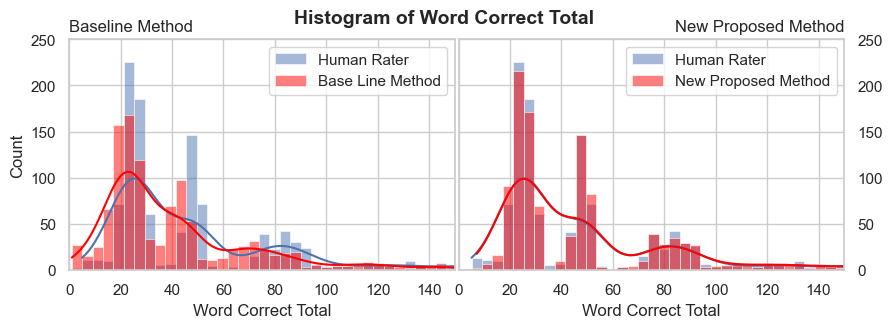

In [122]:
fig2 = plt.figure(figsize=(10, 3))

# Create a GridSpec with 1 row and 2 columns
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], wspace=0.01) 
ylim = (0, 250)
xlim = (0, 150)
ax2 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

# Plotting data as before
# Get Bin edge
# 1. Determine the range for bins
overall_min = min(df10['score_asr'].min(), df10['new_matched_adj_count'].min())
overall_max = max(df10['score_asr'].max(), df10['new_matched_adj_count'].max())

# Set bin width
bin_width = 4

# Calculate number of bins based on bin width
num_bins = int((overall_max - overall_min) / bin_width)

# 3. Calculate bin edges
bin_edges = np.linspace(overall_min, overall_max, num_bins+1)

sns.histplot(data=df10, x="score_asr", color="b", bins=bin_edges, label="Human Rater", kde=True, ax=ax1)
sns.histplot(data=df10, x="new_matched_adj_count", color="red", bins=bin_edges, label="New Proposed Method", kde=True, ax=ax1)
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.legend()
ax1.set_xlabel('Word Correct Total')
ax1.set_title('New Proposed Method', loc='right')
ax1.tick_params(axis='y', which='both', labelright=True, labelleft=False)
ax1.yaxis.set_label_position("right")
ax1.set_ylabel('')

# New
# 1. Determine the range for bins
overall_min = min(df10['score_asr'].min(), df10['old_matched_adj_count'].min())
overall_max = max(df10['score_asr'].max(), df10['old_matched_adj_count'].max())

# 2. Bin size
num_bins = int((overall_max - overall_min) / bin_width)

# 3. Calculate bin edges
bin_edges = np.linspace(overall_min, overall_max, num_bins+1)

sns.histplot(data=df10, x="score_asr", color="b", bins=bin_edges, label="Human Rater", kde=True, ax=ax2)
sns.histplot(data=df10, x="old_matched_adj_count", bins=bin_edges, color="red", label="Base Line Method", kde=True, ax=ax2)
ax2.set_xlim(xlim)
ax2.set_ylim(ylim)
xticks = ax2.get_xticks()
ax2.set_xticks(xticks[:-1])
ax2.set_xlabel('Word Correct Total')
ax2.legend()
ax2.set_title('Baseline Method', loc='left')

fig2.suptitle('Histogram of Word Correct Total', fontsize=14, fontweight='bold')
#fig2.tight_layout()
fig2.savefig('Comparison_Histogram_count.pdf', format='pdf', bbox_inches='tight')

### Margin 0.3
Bootstrap 95% confidence interval for the mean: (7.20, 7.81)
Bootstrap 95% confidence interval for the median: (5.00, 6.00)

In [123]:
df9

score_asr  totalwords_passage  duration  \
student_id passage_id session_id                                               
889        44000      56e83b940b0bc        116               261.0  1.085833   
890        31026      55523bfa763a5         31                31.0  0.257167   
           31032      55523c4ec59c8         22                22.0  0.163000   
           31044      55523c388fca7         29                30.0  0.199333   
           31048      55523c24de884         21                23.0  0.158333   
...                                        ...                 ...       ...   
1047       44000      5564dbc1f021a          8               261.0  0.198167   
                      56e850e638100        153               261.0  1.265333   
1049       44000      56e8347b984b1         95               261.0  1.106833   
1059       34000      56ddf2a8ae72b        134               250.0  1.221333   
1063       44000      56df0aca3e509         17               261.0  0.242833   

                                     correct_rate  original_time_diff  \
student_id passage_id session_id                                        
889        44000      56e83b940b0bc    106.830391            1.029500   
890        31026      55523bfa763a5    120.544394            0.254000   
           31032      55523c4ec59c8    134.969325            0.170667   
           31044      55523c388fca7    145.484950            0.185833   
           31048      55523c24de884    132.631579            0.161500   
...                                           ...                 ...   
1047       44000      5564dbc1f021a     40.370059            0.004000   
                      56e850e638100    120.916754            1.171667   
1049       44000      56e8347b984b1     85.830447            0.898333   
1059       34000      56ddf2a8ae72b    109.716157            0.972500   
1063       44000      56df0aca3e509     70.006863            0.197000   

                                     original_total_word  original_c_w_p_m  \
student_id passage_id session_id                                             
889        44000      56e83b940b0bc                   98         95.191841   
890        31026      55523bfa763a5                   29        114.173228   
           31032      55523c4ec59c8                   19        111.328125   
           31044      55523c388fca7                   27        145.291480   
           31048      55523c24de884                   20        123.839009   
...                                                  ...               ...   
1047       44000      5564dbc1f021a                    1        250.000000   
                      56e850e638100                  143        122.048364   
1049       44000      56e8347b984b1                   43         47.866419   
1059       34000      56ddf2a8ae72b                   96         98.714653   
1063       44000      56df0aca3e509                    7         35.532995   

                                     stemmed_time_diff  stemmed_total_word  \
student_id passage_id session_id                                             
889        44000      56e83b940b0bc           1.029500                  98   
890        31026      55523bfa763a5           0.254000                  30   
           31032      55523c4ec59c8           0.170667                  19   
           31044      55523c388fca7           0.185833                  27   
           31048      55523c24de884           0.161500                  20   
...                                                ...                 ...   
1047       44000      5564dbc1f021a           0.020833                   3   
                      56e850e638100           1.171667                 146   
1049       44000      56e8347b984b1           0.898333                  43   
1059       34000      56ddf2a8ae72b           0.976500                  98   
1063       44000      56df0aca3e509           0.158000                   9   

                

In [124]:
df10

score_asr  totalwords_passage  duration  \
student_id passage_id session_id                                               
889        44000      56e83b940b0bc        116               261.0  1.085833   
890        31026      55523bfa763a5         31                31.0  0.257167   
           31032      55523c4ec59c8         22                22.0  0.163000   
           31044      55523c388fca7         29                30.0  0.199333   
           31048      55523c24de884         21                23.0  0.158333   
...                                        ...                 ...       ...   
1047       44000      5564dbc1f021a          8               261.0  0.198167   
                      56e850e638100        153               261.0  1.265333   
1049       44000      56e8347b984b1         95               261.0  1.106833   
1059       34000      56ddf2a8ae72b        134               250.0  1.221333   
1063       44000      56df0aca3e509         17               261.0  0.242833   

                                     correct_rate  new_matched_adj_count  \
student_id passage_id session_id                                           
889        44000      56e83b940b0bc    106.830391                    113   
890        31026      55523bfa763a5    120.544394                     31   
           31032      55523c4ec59c8    134.969325                     21   
           31044      55523c388fca7    145.484950                     30   
           31048      55523c24de884    132.631579                     23   
...                                           ...                    ...   
1047       44000      5564dbc1f021a     40.370059                     10   
                      56e850e638100    120.916754                    161   
1049       44000      56e8347b984b1     85.830447                     54   
1059       34000      56ddf2a8ae72b    109.716157                    139   
1063       44000      56df0aca3e509     70.006863                     32   

                                     old_matched_adj_count  \
student_id passage_id session_id                             
889        44000      56e83b940b0bc                     98   
890        31026      55523bfa763a5                     29   
           31032      55523c4ec59c8                     19   
           31044      55523c388fca7                     27   
           31048      55523c24de884                     20   
...                                                    ...   
1047       44000      5564dbc1f021a                      1   
                      56e850e638100                    143   
1049       44000      56e8347b984b1                     43   
1059       34000      56ddf2a8ae72b                     96   
1063       44000      56df0aca3e509                      7   

                                     word_correct_per_minutes  difference  \
student_id passage_id session_id                                            
889        44000      56e83b940b0bc                108.810785          15   
890        31026      55523bfa763a5                119.460501           2   
           31032      55523c4ec59c8                123.046875           2   
           31044      55523c388fca7                146.460537           3   
           31048      55523c24de884                142.414861           3   
...                                                       ...         ...   
1047       44000      5564dbc1f021a                144.230769           9   
                      56e850e638100                128.851541          18   
1049       44000      56e8347b984b1                 59.416835          11   
1059       34000      56ddf2a8ae72b                116.075157          43   
1063       44000      56df0aca3e509                134.078212          25   

                                     residual_word  
student_id passage_id session_id                    
889        44000      56e83b940b0bc       1.980393  
890        31026      55523bfa763a5    